In [1]:
import random
import torch
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

from scipy.stats import norm, skewnorm

In [2]:
seed = 633

print("[ Using Seed : ", seed, " ]")

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.cuda.manual_seed(seed)
numpy.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

[ Using Seed :  633  ]


In [3]:
from koopman_probabilistic import KoopmanProb
from model_objs import NormalNLL

In [51]:
all_data = np.load("FPUTscipy.npy")

In [47]:
x = np.transpose(all_data[1::2])
x.shape

(200000, 20)

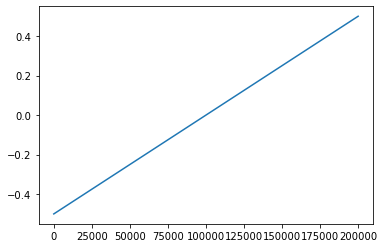

In [58]:
%matplotlib inline
plt.plot(x[:, -1])

In [50]:
x_original = x
mean = np.mean(x, axis=0)
rnge = np.max(x, axis=0) - np.min(x, axis=0)
x = (x - np.matlib.repmat(mean, x.shape[0], 1)) / np.matlib.repmat(rnge, x.shape[0], 1)
print("x", x.shape)

x (200000, 20)


In [52]:
data_name = "FPUTscipy_odd"

train_through = 100_000
train_start = 0
delay = 0
test_length = 100_000
x = x[train_start:]
predict_through = train_through + test_length + delay  
x = x[:predict_through]
xt = x[:train_through]

num_freqs = [5, 5]
num_fourier = 5
hard_code = [10200]
mu_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}mu.npy"
sigma_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}sigma.npy"
# alpha_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}alpha.npy"
print("x", x.shape)
print("xt", xt.shape)

x (200000, 20)
xt (100000, 20)


In [53]:
model = NormalNLL(x_dim=xt.shape[1], num_freqs=num_freqs, n=128)
k = KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32)

In [54]:
k.find_fourier_omegas(xt, hard_code=hard_code)

fourier periods: tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04],
       dtype=torch.float64)


tensor([4.0652e-03, 3.0602e-01, 6.2832e-01, 9.4247e-01, 6.1600e-04],
       dtype=torch.float64)

In [59]:
k.fit(xt, iterations=50, verbose=True, cutoff=0, weight_decay=1e-4, lr_theta=1e-4, lr_omega=0);

Iteration  0
tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04])
Setting periods to tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04],
       grad_fn=<MulBackward0>)
Loss:  -1.2946949310471556
Iteration  1
tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04])
Setting periods to tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04],
       grad_fn=<MulBackward0>)
Loss:  -1.2949967482841291
Iteration  2
tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04])
Setting periods to tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0

Setting periods to tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04],
       grad_fn=<MulBackward0>)
Loss:  -1.3004808281229994
Iteration  24
tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04])
Setting periods to tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04],
       grad_fn=<MulBackward0>)
Loss:  -1.3006820088576208
Iteration  25
tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04])
Setting periods to tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04],
       grad_fn=<MulBackward0>)
Loss:  -1.3008798080752022
Iteration  26
tensor([1.5456e+03, 2.0532e+01, 1.0000e+01

Setting periods to tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04],
       grad_fn=<MulBackward0>)
Loss:  -1.304112759005983
Iteration  47
tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04])
Setting periods to tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04],
       grad_fn=<MulBackward0>)
Loss:  -1.3042307873097967
Iteration  48
tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04])
Setting periods to tensor([1.5456e+03, 2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04, 1.5456e+03,
        2.0532e+01, 1.0000e+01, 6.6667e+00, 1.0200e+04],
       grad_fn=<MulBackward0>)
Loss:  -1.3043403123190371
Iteration  49
tensor([1.5456e+03, 2.0532e+01, 1.0000e+01,

In [60]:
params = k.predict(predict_through)
mu_hat, sigma_hat, = params
np.save(mu_file, mu_hat)
np.save(sigma_file, sigma_hat)

<IPython.core.display.Javascript object>


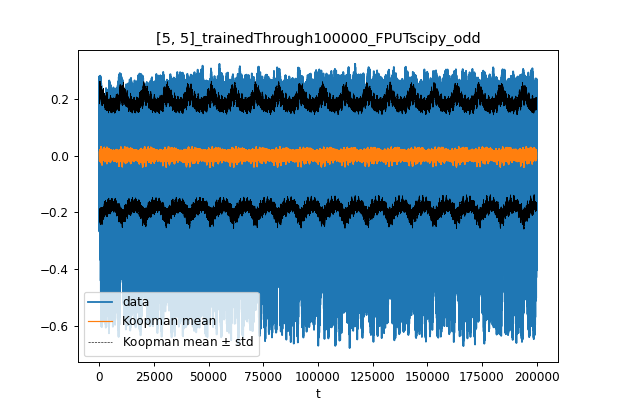

<IPython.core.display.Javascript object>


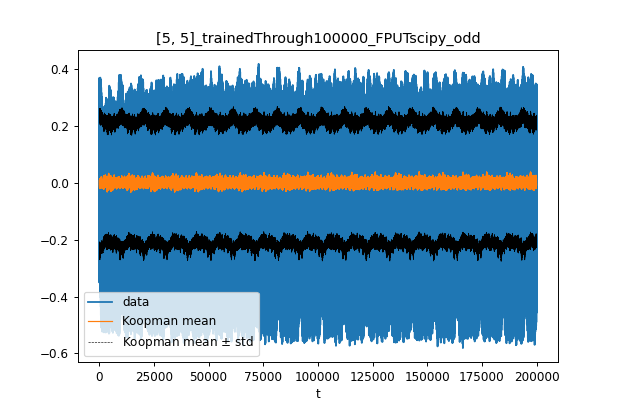

<IPython.core.display.Javascript object>


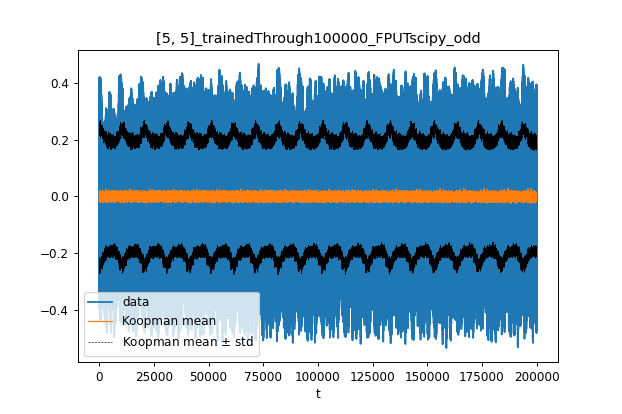

<IPython.core.display.Javascript object>


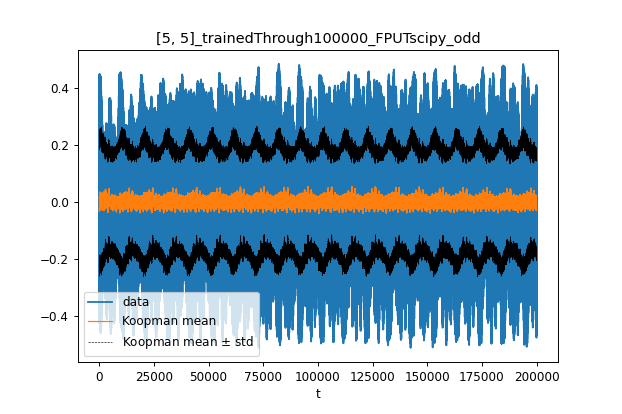

<IPython.core.display.Javascript object>


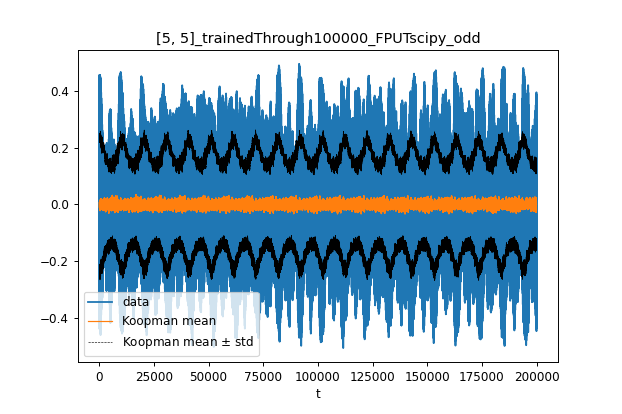

<IPython.core.display.Javascript object>


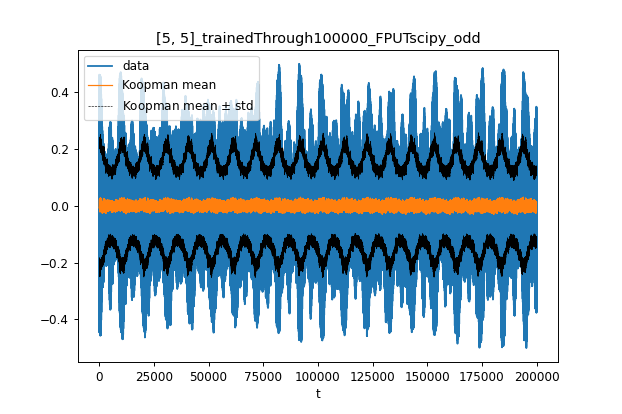

<IPython.core.display.Javascript object>


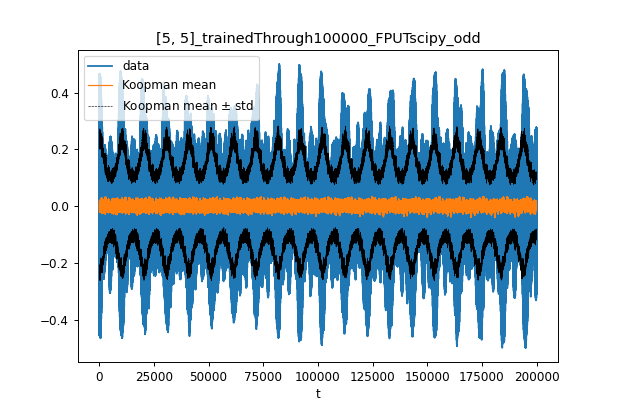

<IPython.core.display.Javascript object>


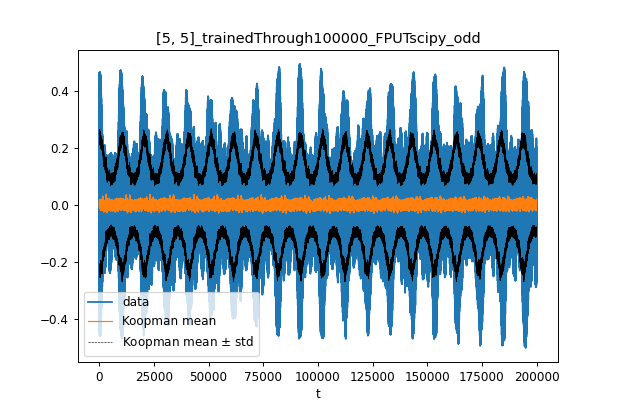

<IPython.core.display.Javascript object>


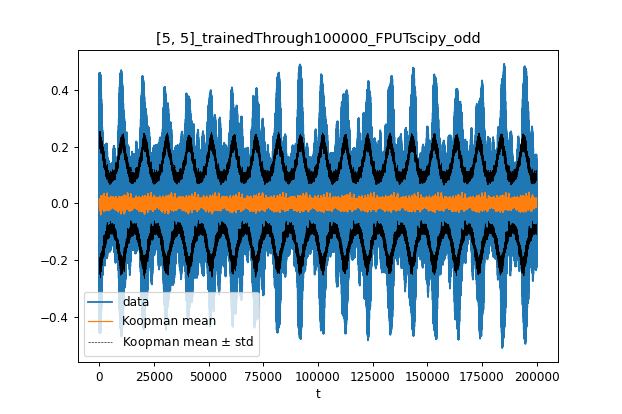

<IPython.core.display.Javascript object>


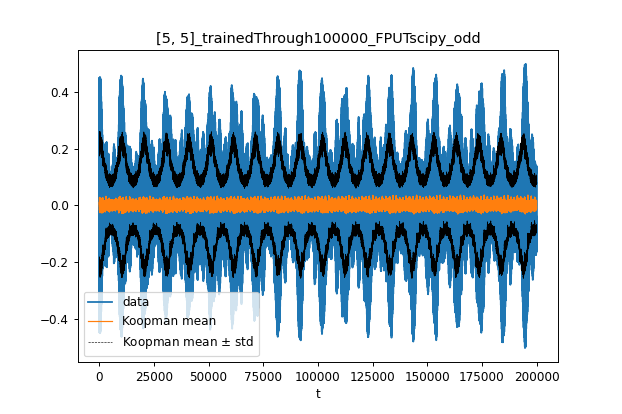

<IPython.core.display.Javascript object>


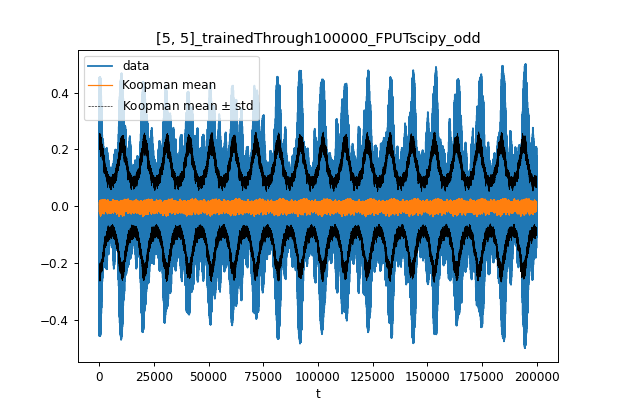

<IPython.core.display.Javascript object>


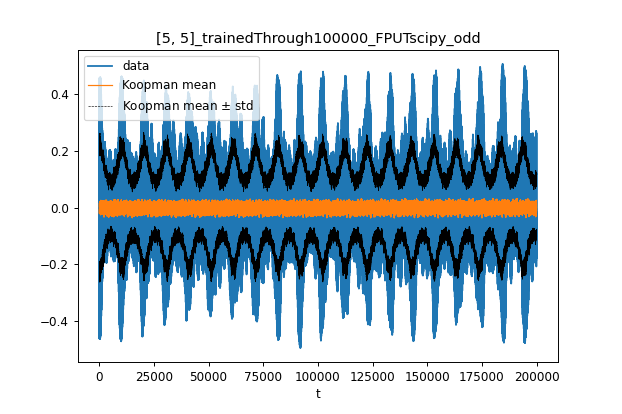

<IPython.core.display.Javascript object>


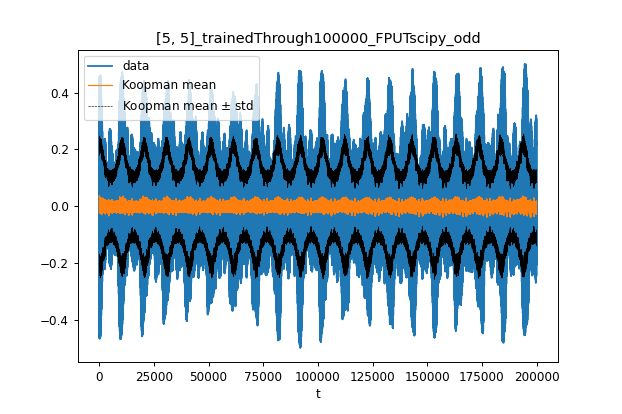

<IPython.core.display.Javascript object>


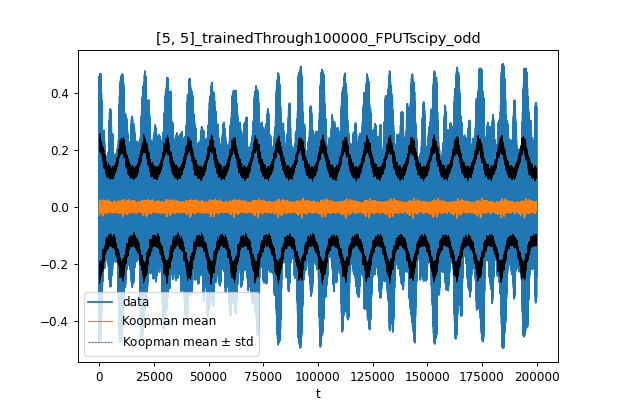

<IPython.core.display.Javascript object>


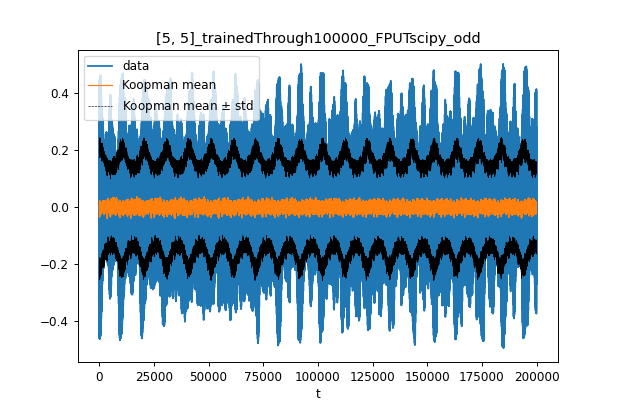

<IPython.core.display.Javascript object>


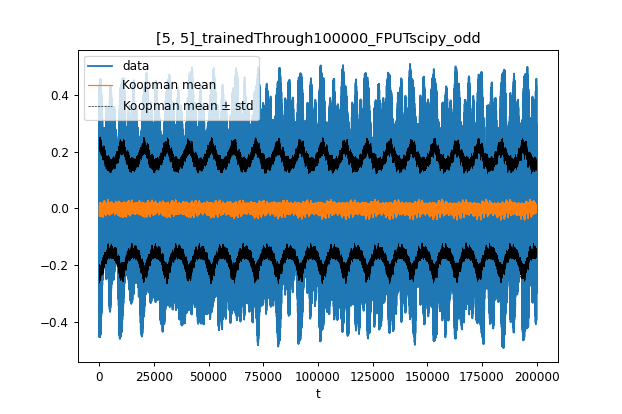

<IPython.core.display.Javascript object>


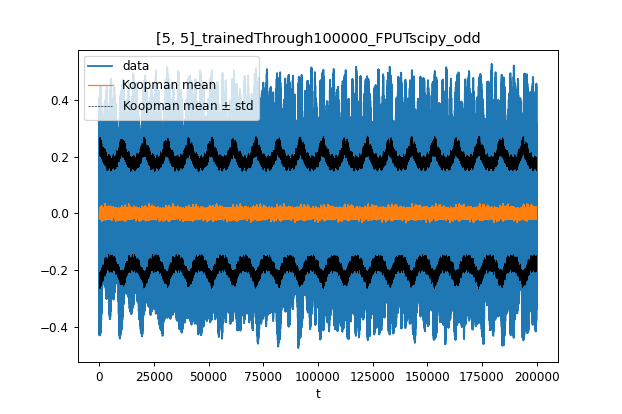

<IPython.core.display.Javascript object>


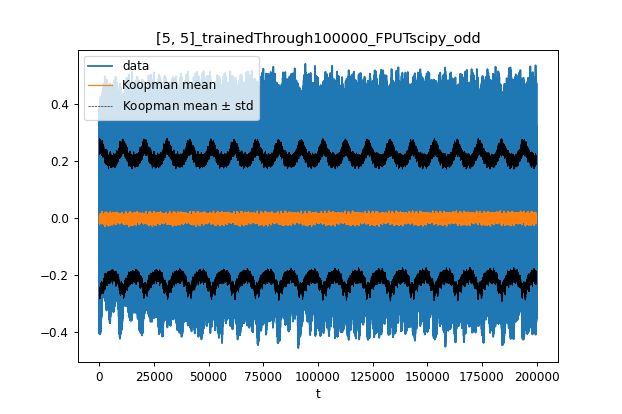

<IPython.core.display.Javascript object>


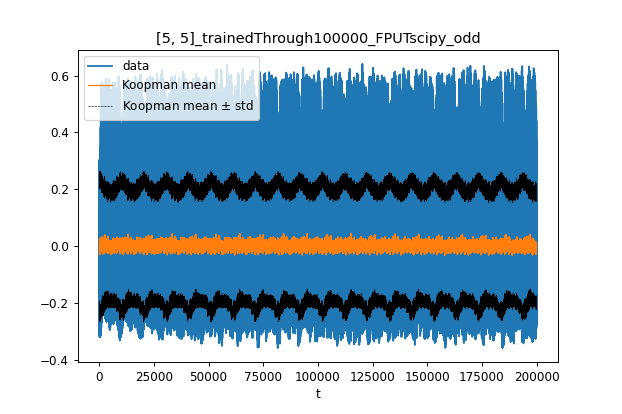

<IPython.core.display.Javascript object>


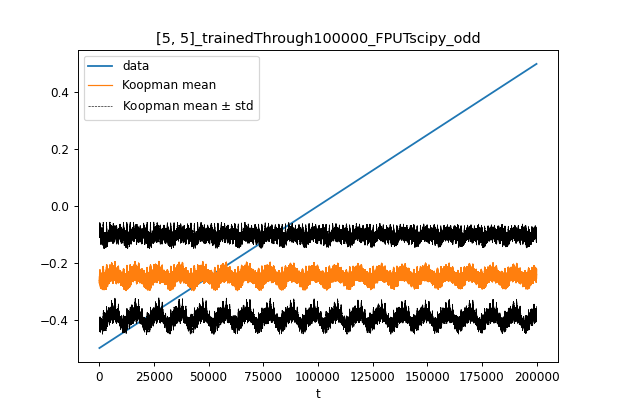

In [61]:
%matplotlib notebook

mean_hat = model.mean(params)
std_hat = model.std(params)
for dim in range(xt.shape[1]):
    plt.figure()
    # plt.scatter(np.arange(-slc), x[slc:], label="data")
    plt.plot(x[:predict_through, dim], label="data")
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
#     plt.plot(a_hat[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
#     plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")

    # plt.plot(mu_vec[slc:], label="real mu")
    # plt.plot(mu_hat[slc:, 0], label="koopman mu")
    # plt.legend()
    # plt.show()
    #
    # plt.plot(sigma_vec[slc:], label="real sigma")
    #     plt.plot(3*sigma_hat[:, dim], label="koopman $3\sigma$", linewidth=0.7)
    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()

In [96]:
# plt.figure()
# plt.plot(np.arange(len(oldx), len(oldx) + len(x_original)), x_original, label="2021")
# plt.plot(oldx, label="demand 2005-15")
# plt.legend()
# plt.show()

In [30]:
print("actual overall mean:", 0, " predicted mean:", np.mean(mean_hat[:train_through]))

actual overall mean: 0  predicted mean: 0.009649986


In [98]:
"mean of a_hat", np.mean(a_hat), "std of a_hat", np.std(a_hat)

('mean of a_hat', 2.3238902, 'std of a_hat', 0.4065727)

In [14]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

In [21]:
z_scores = ((x[:train_through] - mean_hat[:train_through]) / std_hat[:train_through])
# z_scores = ((x[train_through:predict_through] - mean_hat[train_through:]) / std_hat[train_through:])[:8760, 0]
# z_scores /= np.std(z_scores)
z_hist, bin_edges = np.histogram(z_scores, bins=40, density=True)
z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2

In [22]:
print(np.std(z_scores))
np.mean(z_scores)

0.9739735982666695


-0.10160407016708353

<IPython.core.display.Javascript object>


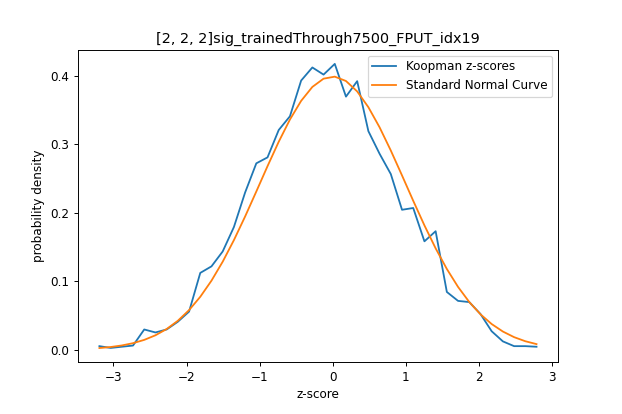

In [23]:
plt.figure()
plt.plot(z_axis, z_hist, label="Koopman z-scores")
plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
plt.title(f"{num_freqs}sig_trainedThrough{train_through}_" + data_name)
plt.xlabel("z-score")
plt.ylabel("probability density")
plt.legend()

In [81]:
mu_hat -= np.mean(mean_hat[:train_through])

# Pinball Loss

In [82]:
def skew_pinball_loss(data, mus, sigmas, alphas, quantiles=range(10, 100, 10)):
    loss = 0
    for i in range(len(data)):
        for q in quantiles:
            q = q / 100
            quant_pred = skewnorm.ppf(q, alphas[i], loc=mus[i], scale=sigmas[i])
            if quant_pred > data[i]:
                loss += (quant_pred - data[i]) * (1 - q)
            else:
                loss += (data[i] - quant_pred) * q
    return loss / (len(data) * len(quantiles))

In [83]:
def normal_pinball_loss(data, mus, sigmas, quantiles=range(10, 100, 10)):
    loss = 0
    for i in range(len(data)):
        for q in quantiles:
            q = q / 100
            quant_pred = norm.ppf(q, loc=mus[i], scale=sigmas[i])
            if quant_pred > data[i]:
                loss += (quant_pred - data[i]) * (1 - q)
            else:
                loss += (data[i] - quant_pred) * q
    return loss / (len(data) * len(quantiles))

<IPython.core.display.Javascript object>


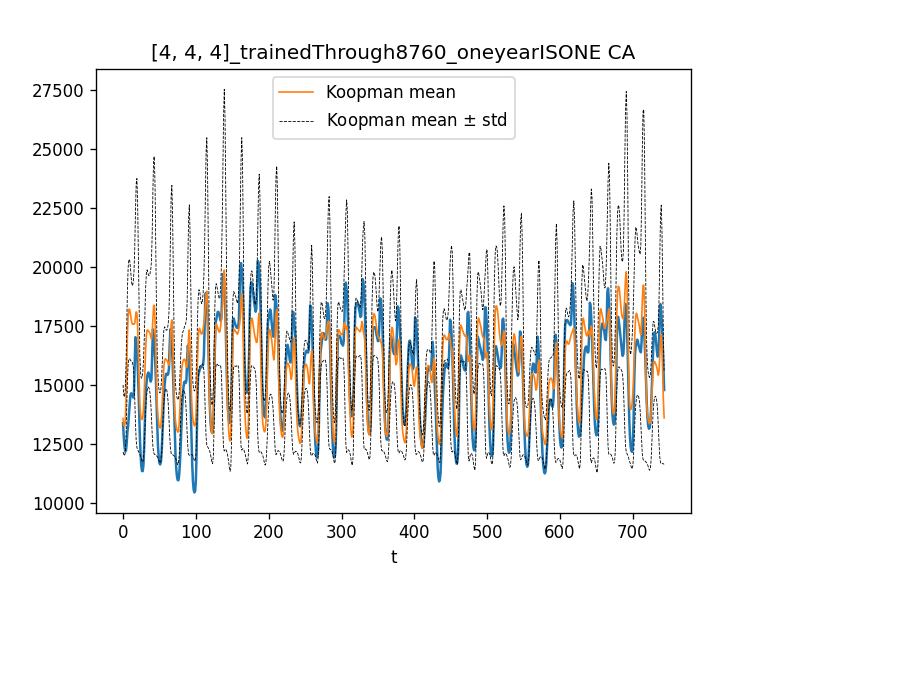

In [84]:
test_start = train_through + delay
# Skew Normal Distribution rescaling
sigh, ah = sigma_hat[test_start: predict_through], a_hat[test_start: predict_through]
delta = ah / (1 + ah ** 2) ** 0.5
muh = mu_hat[test_start: predict_through] * rnge + (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
muh = muh + mean - (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
sigh = sigh * rnge
mean_hat = model.mean([muh, sigh, ah])
std_hat = model.std([muh, sigh, ah])

# # Normal Distribution
# sigh = sigma_hat[test_start: predict_through] * rnge
# muh = mu_hat[test_start: predict_through] * rnge + mean
# mean_hat = model.mean([muh, sigh])
# std_hat = model.std([muh, sigh])

plt.figure()
plt.plot(x_original[train_start:][test_start: predict_through])
plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
# plt.plot(ah[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
# plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")
plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
plt.xlabel("t")
plt.legend()
plt.show()

In [85]:
# loss = normal_pinball_loss(x_original[train_start:][test_start: predict_through], muh, sigh)
loss = skew_pinball_loss(x_original[train_start:][test_start: predict_through], muh, sigh, ah)
print(loss)

[441.91462544]


In [87]:
import vanilla_benchmark

vanilla_losses = vanilla_benchmark.get_lossesGEFCom(start=train_start, plot=False)
print(vanilla_losses)

ISONE CA
start: 2014-01-01 00:00:00
ME
start: 2014-01-01 00:00:00
RI
start: 2014-01-01 00:00:00
VT
start: 2014-01-01 00:00:00
CT
start: 2014-01-01 00:00:00
NH
start: 2014-01-01 00:00:00
SEMASS
start: 2014-01-01 00:00:00
WCMASS
start: 2014-01-01 00:00:00
NEMASSBOST
start: 2014-01-01 00:00:00
{'ISONE CA': 381.90378149175325, 'ME': 29.5225280460456, 'RI': 24.10316079531464, 'VT': 15.967894087158326, 'CT': 106.84865130851064, 'NH': 36.62805990777599, 'SEMASS': 48.63787072147622, 'WCMASS': 55.24190168505761, 'NEMASSBOST': 80.30352911316842}


In [88]:
1 - loss/vanilla_losses[zone_name]

# with 52 day gap between training and testing
# 1 - loss / 84.2  # WCMASS +25%
# 1 - loss / 122.8  # NEMASSBOST 39.4%
# 1 - loss / 596  # ISONE 19.4%
# VT: +9.2%
# (old--Monday=0) {'ISONE CA': 523.7428637110866, 'ME': 58.71157246544602, 'RI': 36.73051071209801, 'VT': 22.977155005752657, 'CT': 141.30040329213762, 'NH': 63.25224646477936, 'SEMASS': 65.42717786334023, 'WCMASS': 70.82418918073226, 'NEMASSBOST': 110.09485925971588}


array([-0.15713603])

In [68]:
import os

folder = ".\\forecasts\GEFComFirstQualTest"
a_hat = np.load(os.path.join(folder, "WCMASStrained-17520-8760_[6, 6, 6]alpha.npy"))
mu_hat = np.load(os.path.join(folder, "WCMASStrained-17520-8760_[6, 6, 6]mu.npy"))
sigma_hat = np.load(os.path.join(folder, "WCMASStrained-17520-8760_[6, 6, 6]sigma.npy"))

In [141]:
with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017Qual2005-2015.json") as f:
    all_data1 = json.loads(f.read())
    
with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017Qual2016.json") as f:
    all_data2 = json.loads(f.read())
    
with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017Qual2017.json") as f:
    all_data3 = json.loads(f.read())

In [142]:
zone_name = 'WCMASS'

In [143]:
all_data1[zone_name].keys()

dict_keys(['Date', 'Hour', 'DA_DEMD', 'DEMAND', 'DA_LMP', 'DA_EC', 'DA_CC', 'DA_MLC', 'RT_LMP', 'RT_EC', 'RT_CC', 'RT_MLC', 'DryBulb', 'DewPnt'])

In [144]:
all_data2[zone_name].keys()

dict_keys(['Date', 'Hr_End', 'DA_Demand', 'RT_Demand', 'DA_LMP', 'DA_EC', 'DA_CC', 'DA_MLC', 'RT_LMP', 'RT_EC', 'RT_CC', 'RT_MLC', 'Dry_Bulb', 'Dew_Point'])

In [145]:
all_data3[zone_name].keys()

dict_keys(['Date', 'Hr_End', 'DA_Demand', 'RT_Demand', 'DA_LMP', 'DA_EC', 'DA_CC', 'DA_MLC', 'RT_LMP', 'RT_EC', 'RT_CC', 'RT_MLC', 'Dry_Bulb', 'Dew_Point'])

In [146]:
rename_isone = {'Date': 'Date',
        'Hr_End': 'Hour',
        'DA_Demand': 'DA_DEMD',
        'RT_Demand': 'DEMAND',
        'DA_LMP': 'DA_LMP',
        'DA_EC': 'DA_EC',
        'DA_CC': 'DA_CC',
        'DA_MLC': 'DA_MLC',
        'RT_LMP': 'RT_LMP',
        'RT_EC': 'RT_EC',
        'RT_CC': 'RT_CC',
        'RT_MLC': 'RT_MLC',
        'Dry_Bulb': 'DryBulb',
        'Dew_Point': 'DewPnt',
        'System_Load': 'SYSLoad',
        'Reg_Capacity_Price': 'RegCP'
       }
rename = {'Date': 'Date',
        'Hr_End': 'Hour',
        'DA_Demand': 'DA_DEMD',
        'RT_Demand': 'DEMAND',
        'DA_LMP': 'DA_LMP',
        'DA_EC': 'DA_EC',
        'DA_CC': 'DA_CC',
        'DA_MLC': 'DA_MLC',
        'RT_LMP': 'RT_LMP',
        'RT_EC': 'RT_EC',
        'RT_CC': 'RT_CC',
        'RT_MLC': 'RT_MLC',
        'Dry_Bulb': 'DryBulb',
        'Dew_Point': 'DewPnt',
       }

In [147]:
all_data = all_data1.copy()

In [148]:
for zone in all_data.keys():
    if zone == "ISONE CA":
        for quantity in rename_isone.keys():
            name = rename_isone[quantity]
            all_data[zone][name].extend(all_data2[zone][quantity])
            all_data[zone][name].extend(all_data3[zone][quantity])
    else:
        for quantity in rename.keys():
            name = rename[quantity]
            all_data[zone][name].extend(all_data2[zone][quantity])
            
            all_data[zone][name].extend(all_data3[zone][quantity])
            

In [149]:
x = np.array(all_data[zone_name]["DEMAND"])

In [150]:
x1 = (all_data1[zone_name]["DEMAND"])

In [151]:
len(x2), len(x3), len(x)

(8784, 8760, 113952)

In [152]:
import pandas as pd

In [153]:
dates = np.array(list(map(pd.Timestamp, all_data["ISONE CA"]["Date"])))
hours = np.array(list(pd.Timedelta(hours=h-1) for h in all_data["ISONE CA"]["Hour"]))
dates += hours
dates = list(map(str, dates))

In [154]:
for zone in all_data.keys():
    all_data[zone]["Date"] = dates

In [155]:
all_data[zone_name].keys()

dict_keys(['Date', 'Hour', 'DA_DEMD', 'DEMAND', 'DA_LMP', 'DA_EC', 'DA_CC', 'DA_MLC', 'RT_LMP', 'RT_EC', 'RT_CC', 'RT_MLC', 'DryBulb', 'DewPnt'])

In [156]:
len(all_data[zone]["Date"]) / 8760

13.008219178082191

In [157]:
json_data = json.dumps(all_data)
with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017QualAll.json", "w") as f:
    f.write(json_data)